In [1]:
# !pip install bokeh==2.2.2
# !pip install jinja2==2.11.2
# !pip install scikit-learn
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fnmatch import fnmatch
import re
from datetime import datetime,timedelta
from scipy.ndimage import uniform_filter1d

# import bokeh.sampledata
# bokeh.sampledata.download()

from bokeh.io import show , output_notebook
from bokeh.layouts import column, gridplot,layout
from bokeh.models import ColumnDataSource, RangeTool, HoverTool, TapTool, OpenURL,LinearColorMapper, CustomJS
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL
from bokeh.transform import factor_cmap
from bokeh.events import Tap
from bokeh.palettes import Spectral6,gray

plt.rcParams["figure.figsize"] = (20,10)

output_notebook()

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

Loading BokehJS ...

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [3]:
# change the metadata (the last column is the loss) path to yours

metadataPath = r"MNAD3515.csv"  


metadata = pd.read_csv(metadataPath)
#metadata['DateTime'] = pd.to_datetime(metadata['DateTime'], dayfirst = True)
metadata.head()

#print(metadata['DateTime'])

,Folder name,Clip Name,Image Number,DateTime,Temperature,Humidity,Precipitation,Dew Point,Wind Direction,Wind Speed,Sun Radiation Intensity,Min of sunshine latest 10 min,MSE,MSE_moving_bkgrnd
0,20200814,clip_34_1503,0,2021-02-14 00:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.006459,0.000966
1,20200814,clip_34_1503,2,2021-02-14 00:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.006383,0.000917
2,20200814,clip_34_1503,4,2021-02-14 00:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.006416,0.000972
3,20200814,clip_34_1503,6,2021-02-14 00:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.006555,0.000724
4,20200814,clip_34_1503,8,2021-02-14 00:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.006468,0.001030


In [4]:
npplot=metadata


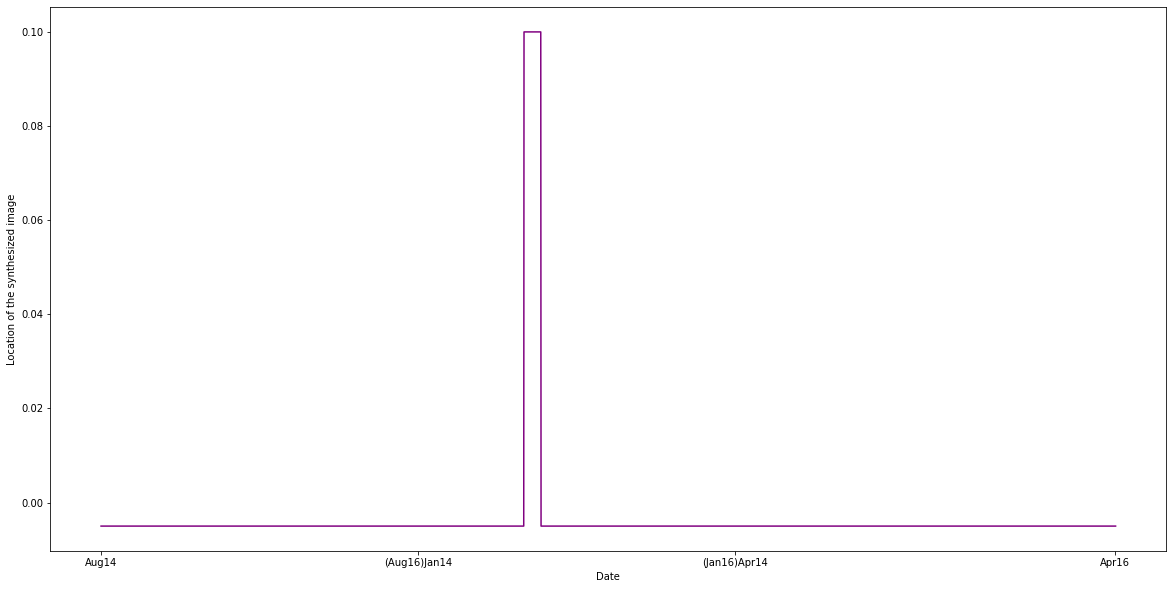

In [5]:
x = np.linspace(start=1, stop=npplot.shape[0], num = npplot.shape[0])

loc = -0.005*np.ones(npplot.shape[0])

loc[1465:1524]=0.1

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.setp(axes, xticks=[0, 1098, 2196, 3514], xticklabels=['Aug14', '(Aug16)Jan14', '(Jan16)Apr14', 'Apr16'])
plt.plot(x, loc,'purple')
plt.xlabel("Date")
plt.ylabel("Location of the synthesized image")
plt.show()

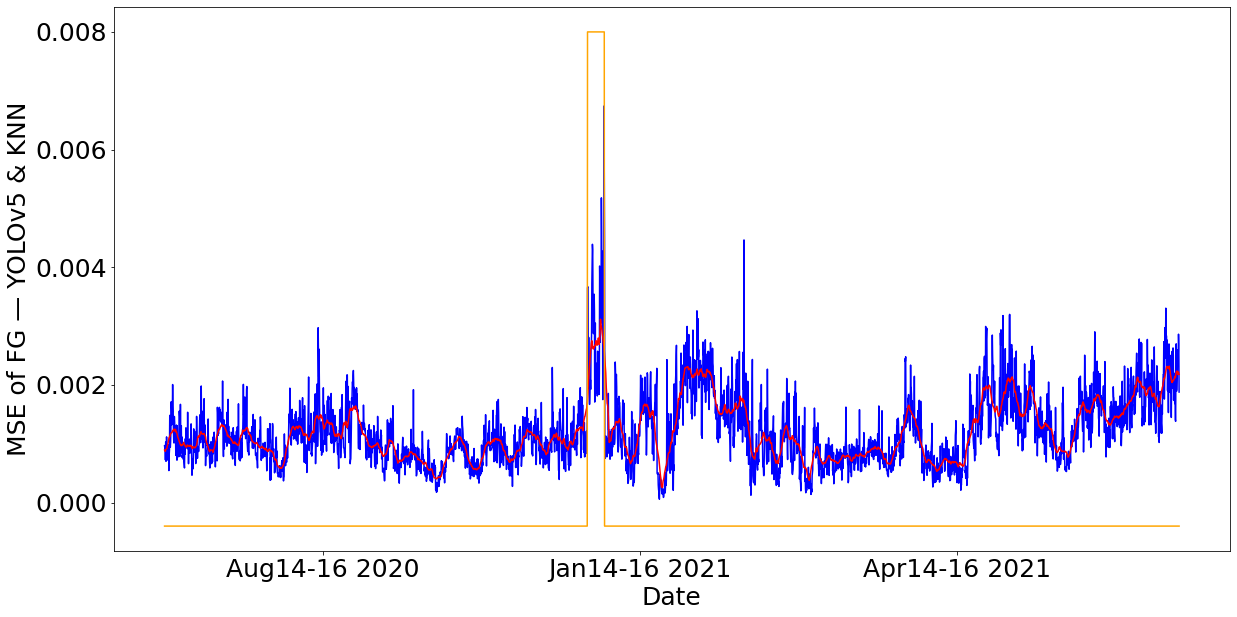

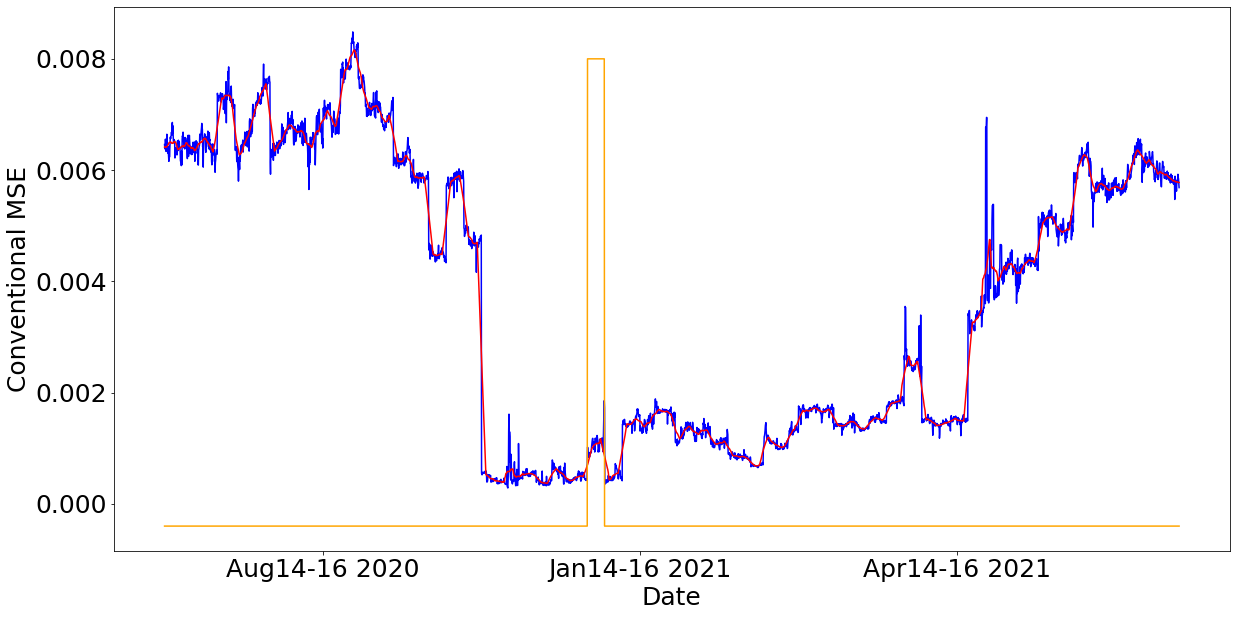

In [6]:
npboxfgloss = npplot['MSE_moving_bkgrnd'].to_numpy()

npbigloss = npplot['MSE'].to_numpy()

filtered_boxfgloss = uniform_filter1d(npboxfgloss, size=30)

filtered_bigloss = uniform_filter1d(npbigloss, size=30)

x = np.linspace(start=1, stop=npplot.shape[0], num = npplot.shape[0])

loc1=loc*0.08

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.setp(axes, xticks=[549, 1647, 2745], xticklabels=['Aug14-16 2020', 'Jan14-16 2021', 'Apr14-16 2021'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(x, npboxfgloss,'blue',x, filtered_boxfgloss, 'red', x, loc1, 'orange')
plt.xlabel("Date",fontsize=25)
plt.ylabel("MSE of FG — YOLOv5 & KNN",fontsize=25)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.setp(axes, xticks=[549, 1647, 2745], xticklabels=['Aug14-16 2020', 'Jan14-16 2021', 'Apr14-16 2021'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(x, npbigloss,'blue', x, filtered_bigloss, 'red', x, loc1, 'orange')
plt.xlabel("Date",fontsize=25)
plt.ylabel("Conventional MSE",fontsize=25)
plt.show()